# Exercice 0: Getting Started: standard Hopfield network
## Exercise 0.1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
# Set seed for reproducibility
np.random.seed(42)

# Ex 0.1 Implement methods for patterns and network state update
def generate_balanced_random_patterns(N, M):
    return np.array(np.random.choice([-1, 1], (M, N)),dtype=float)


def update_state(S, W, beta=4):
    h = np.dot(W, S)
    return (np.tanh(beta * h))




# Exercise 0.2

In [3]:
def flip_bits(pattern, c):
    flip_indices = np.random.choice(len(pattern), size=int(len(pattern) * c), replace=False)
    pattern_flipped = pattern.copy()
    pattern_flipped[flip_indices] *= -1
    
    return pattern_flipped


def compute_overlap(state, patterns):
    return np.dot(patterns, state) / len(state)

def run_standard_hopfield_network(N, M, T):
    patterns = generate_balanced_random_patterns(N, M)
    W = 1/N * np.dot(patterns.T, patterns)
 
    # Set initial state close to the first pattern
    initial_state = flip_bits(patterns[0], c=0.05)
    # Let the network evolve
    state = initial_state
    for t in range(T):  # Simulate for 20 time steps
            state = update_state(state, W)
            overlaps = compute_overlap(state, patterns)
            #print(f"Time step {t}, Overlaps: {overlaps}")
    
    return state, patterns
    
def plot_standard_hopfield_network_results(M, state, patterns):
    fig, ax = plt.subplots(nrows=M, ncols=2, figsize=(5, 5))
    # Display the original pattern
    for i in range(M):
        ax[i, 0].imshow(patterns[i].reshape(10, 10), cmap='binary', vmin=-1, vmax=1)
        ax[i, 0].set_title(f'Original Pattern {i+1}')
        ax[i, 0].axis('off')  # Hide grid lines and ticks for clarity
        # Display the retrieved pattern
        ax[i, 1].imshow(state.reshape(10, 10), cmap='binary', vmin=-1, vmax=1)
        ax[i, 1].set_title(f'Retrieved Pattern {i+1}')
        ax[i, 1].axis('off')  # Hide grid lines and ticks for clarity
    plt.suptitle("Comparison of Original and Retrieved Patterns")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig("Ex0.2_pattern_retrieval.png", )
    plt.show()


Computational cost: 0.007385969161987305 seconds


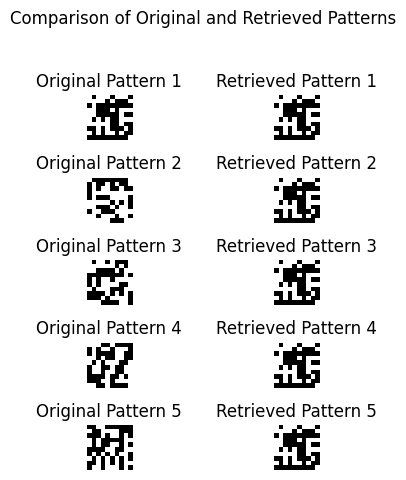

In [4]:

N = 100
M = 5
T = 10
start_time = time.time()
state, patterns = run_standard_hopfield_network(N,M,T)
print("Computational cost:", time.time() - start_time, "seconds")
plot_standard_hopfield_network_results(M,state,patterns)

# Exercise 1: Storage capacity in the standard Hopfield network
## Exercise 1.1

In [5]:
def update_state_with_overlaps(state,patterns, beta=4):
    #h = np.zeros_like(S, dtype=float)
    #for i in range(N):
        #h[i] = np.sum(m * patterns[:, i])
    m= np.dot(patterns, state) / N
    h=np.dot(m,patterns)
    
    return np.tanh(beta * h)

def run_standard_hopfield_network_with_overlaps(N, M, T):
    patterns = generate_balanced_random_patterns(N, M)
    

    #W = 1/N * np.dot(patterns.T, patterns)
    # Set initial state close to the first pattern
    initial_state = flip_bits(patterns[0], c=0.05)
    # Let the network evolve
    state = initial_state
    
    for t in range(T):  # Simulate for 20 time steps
        state = update_state_with_overlaps(state,patterns)


    return state, patterns

In [6]:
N = 100
M = 5
T = 10
start_time1 = time.time()
_,_ = run_standard_hopfield_network_with_overlaps(N,M,T)
end_time1 = time.time()
print("Computational cost of single update step:", end_time1 - start_time1, "seconds")

start_time2 = time.time()
_,_ = run_standard_hopfield_network(N,M,T)
end_time2=time.time()
print("Computational cost of standard update step:", end_time2 - start_time2, "seconds")

Computational cost of single update step: 0.0014193058013916016 seconds
Computational cost of standard update step: 0.0023458003997802734 seconds


## Exercise 1.2

In [7]:
def hamming_distance(P1, P2):
    return (len(P1) - np.dot(P1, P2)) / (2 * len(P1))

## Exercise 1.3

In [48]:
# Parameters

def run_standard_hopfield_network_with_hamming_distance(N,M,T):
    patterns = generate_balanced_random_patterns(N, M)
    patterns =np.array(patterns,dtype=float)
    initial_state = flip_bits(patterns[0], c=0.15)
    state = initial_state
    distances = []


  
    # Simulate the network
    for t in range(T):
        
        state = update_state_with_overlaps(state,patterns)  # Example overlap
        print(state)
        distances.append([hamming_distance(state, p) for p in patterns])
        overlaps = compute_overlap(state, patterns)
        print(f"Time step {t}, Overlaps: {overlaps}")
    
    return np.array(distances,dtype=float), state, patterns
    
def plot_patterns_state_comparison_hamming_distances(distances,M, state,patterns):

    fig, ax = plt.subplots(nrows=M, ncols=2, figsize=(12, 12))
    
    for i in range(M):
        # Display the original pattern
        ax[i, 0].imshow(patterns[i].reshape(15, 20), cmap='binary', vmin=-1, vmax=1)
        ax[i, 0].set_title(f'Original Pattern {i+1}')
        ax[i, 0].axis('off')  # Hide grid lines and ticks for clarity
    
        # Display the retrieved pattern (assuming final state resembles the first pattern)
        ax[i, 1].imshow(state.reshape(15, 20), cmap='binary', vmin=-1, vmax=1)
        ax[i, 1].set_title(f'Retrieved Pattern {i+1}')
        ax[i, 1].axis('off')  # Hide grid lines and ticks for clarity
    
    # Add a super title and show the plot for patterns
    plt.suptitle('Comparison of Original and Retrieved Patterns')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    
    # Plot Hamming distances
    plt.figure(figsize=(10, 5))
    for i in range(M):
        plt.plot(distances[:, i], label=f'Pattern {i+1}')
    plt.xlabel('Time step')
    plt.ylabel('Hamming distance')
    plt.title('Evolution of Hamming Distances Over Time')
    plt.legend()
    plt.show()

[-0.97509574  0.98531442  0.9893146   0.99371757  0.99630965  0.99371757
 -0.97983193 -0.99701755 -0.98531442  0.99701755  0.98185392 -0.99371757
  0.99492145 -0.9893146  -0.97509574 -0.99701755  0.9973189   0.9893146
  0.97509574  0.98531442  0.98811896  0.98185392  0.99630965  0.99543409
  0.99135853 -0.98811896 -0.98531442 -0.99371757  0.98811896  0.99543409
  0.99701755 -0.97983193  0.9973189   0.99492145  0.99543409  0.9893146
  0.99492145 -0.98811896 -0.98531442 -0.9973189  -0.97509574  0.99135853
 -0.99492145 -0.9973189  -0.99630965 -0.98811896 -0.99630965 -0.99630965
  0.99630965  0.9973189   0.99371757  0.99701755 -0.98811896  0.99630965
 -0.99783342  0.98531442  0.99371757  0.99371757  0.9973189  -0.9973189
  0.98531442 -0.98531442 -0.98185392 -0.99371757 -0.98531442  0.98531442
 -0.9973189   0.97983193  0.99701755  0.97509574  0.98531442 -0.98531442
 -0.99492145 -0.99630965 -0.99701755  0.99701755  0.9893146   0.99543409
  0.98185392  0.99701755  0.98185392 -0.99543409 -0.98

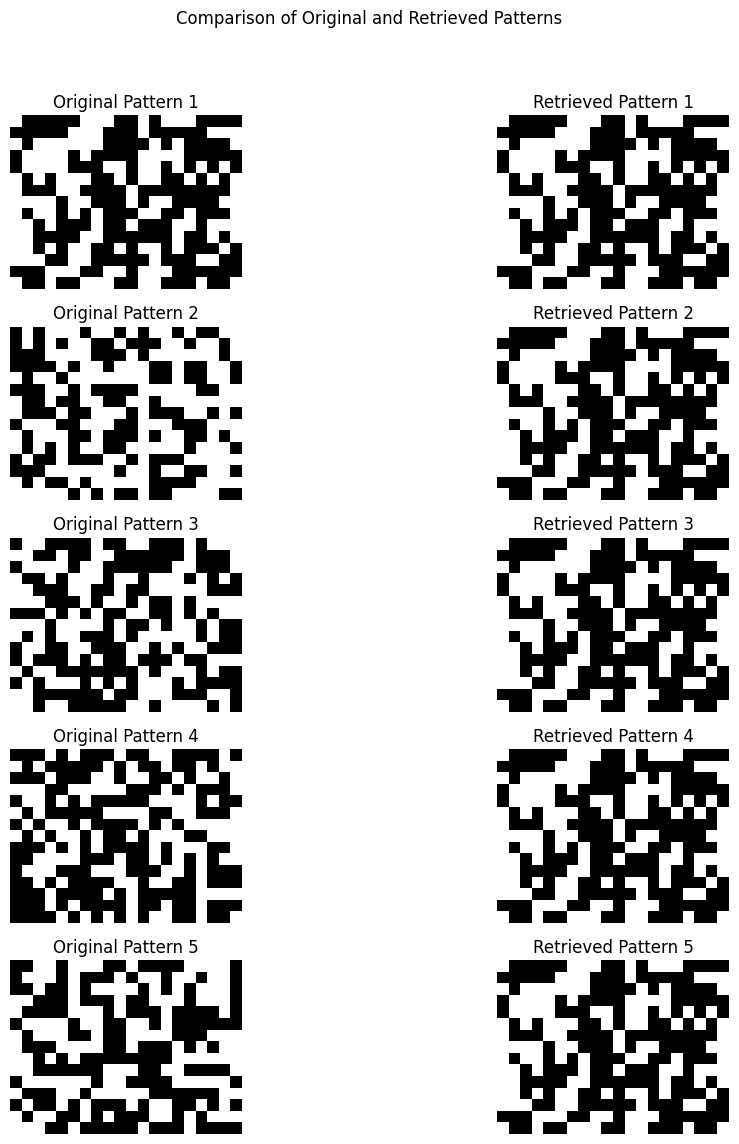

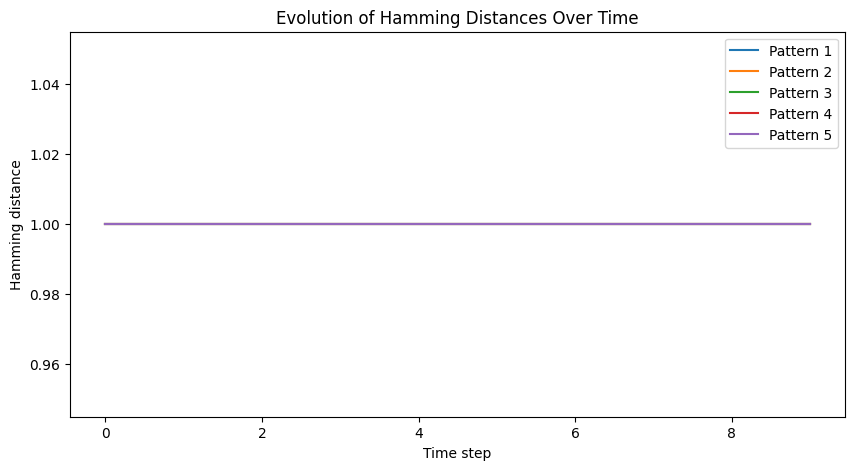

In [49]:
N = 300
M = 5
T = 10
distances, state, patterns = run_standard_hopfield_network_with_hamming_distance(N,M,T)
plot_patterns_state_comparison_hamming_distances(distances, M, state, patterns)

## Exercise 1.4

In [10]:
def pattern_retrieval_error_and_count(patterns, N, T=50, beta=4):
    retrieval_errors = []
    retrieval_counts = []
    for pattern in patterns:
        initial_state = flip_bits(pattern, c=0.05)
        state = initial_state
        
        for t in range(T):
            state = update_state_with_overlaps(state,patterns, beta)
            print(state)
        retrieval_errors.append(hamming_distance(pattern, state))
        retrieval_counts.append(hamming_distance(pattern, state) <= 0.05)
    return np.mean(retrieval_errors), np.std(retrieval_errors), np.sum(retrieval_counts)

# Run simulations for different dictionary initializations
def run_simulation_dictionary(M, N=300, iterations=5,beta=4):
    mean_errors = []
    std_errors = []
    pattern_counts = []
    for _ in range(iterations):
        patterns = generate_balanced_random_patterns(N, M)
        mean_error, std_error, count = pattern_retrieval_error_and_count(patterns, N, beta=beta)
        mean_errors.append(mean_error)
        std_errors.append(std_error)
        pattern_counts.append(count)
    return np.mean(mean_errors), np.mean(std_errors), np.mean(pattern_counts)

In [11]:
mean_error, std_error, avg_retrieved = run_simulation_dictionary(5)
print(f"Mean error: {mean_error}, STD of error: {std_error}, Average retrieved patterns: {avg_retrieved}")


Mean error: 0.0004288620057279559, STD of error: 4.079523960984654e-05, Average retrieved patterns: 5.0


## Exercise 1.5

5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


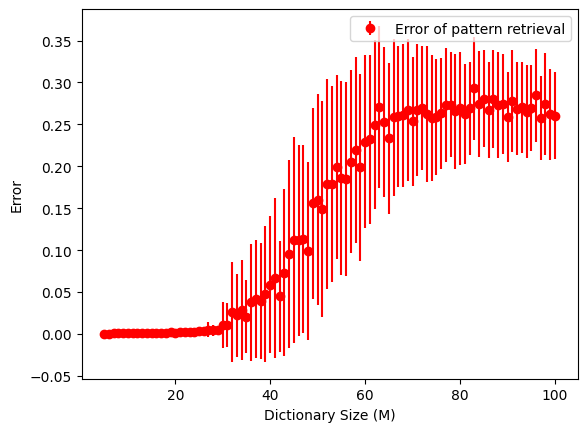

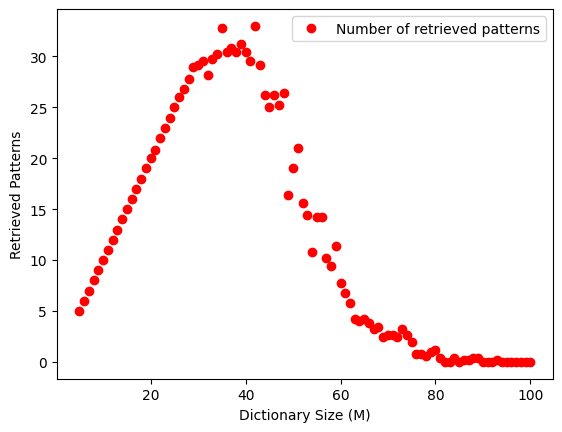

In [12]:
dict_sizes = range(5, 101, 1)  # Example range
errors = []
stds = []
retrievals = []

for M in dict_sizes:
    print(M)
    mean_error, std_error, avg_retrieved = run_simulation_dictionary(M)
    errors.append(mean_error)
    stds.append(std_error)
    retrievals.append(avg_retrieved)

# Plotting the results
plt.errorbar(dict_sizes, errors, yerr=stds, fmt='ro', label='Error of pattern retrieval')
plt.xlabel('Dictionary Size (M)')
plt.ylabel('Error')
plt.legend()
plt.show()

plt.plot(dict_sizes, retrievals, 'ro', label='Number of retrieved patterns')
plt.xlabel('Dictionary Size (M)')
plt.ylabel('Retrieved Patterns')
plt.legend()
plt.show()

In [13]:
retrievals

[5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 20.8,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 26.8,
 27.8,
 29.0,
 29.2,
 29.6,
 28.2,
 29.8,
 30.2,
 32.8,
 30.4,
 30.8,
 30.4,
 31.2,
 30.4,
 29.6,
 33.0,
 29.2,
 26.2,
 25.0,
 26.2,
 25.2,
 26.4,
 16.4,
 19.0,
 21.0,
 15.6,
 14.4,
 10.8,
 14.2,
 14.2,
 10.2,
 9.4,
 11.4,
 7.8,
 6.8,
 5.8,
 4.2,
 4.0,
 4.2,
 3.8,
 3.2,
 3.4,
 2.4,
 2.6,
 2.6,
 2.4,
 3.2,
 2.6,
 2.0,
 0.8,
 0.8,
 0.6,
 1.0,
 1.2,
 0.4,
 0.0,
 0.0,
 0.4,
 0.0,
 0.2,
 0.2,
 0.4,
 0.4,
 0.0,
 0.0,
 0.0,
 0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

## Exercise 1.6

In [14]:
# Ex 1.6 Maximal number of patterns Mmax and retrieval errors beyond Mmax
# This is determined from the plot generated in Ex 1.5, where the number of retrieved patterns starts to decrease
# significantly, and the error increases. This is usually where the network capacity C is reached.
# Mmax is the dictionary size M for which the number of retrieved patterns is maximized before the network's performance
# begins to degrade.



## Exercise 1.7

50
100
300
500
800


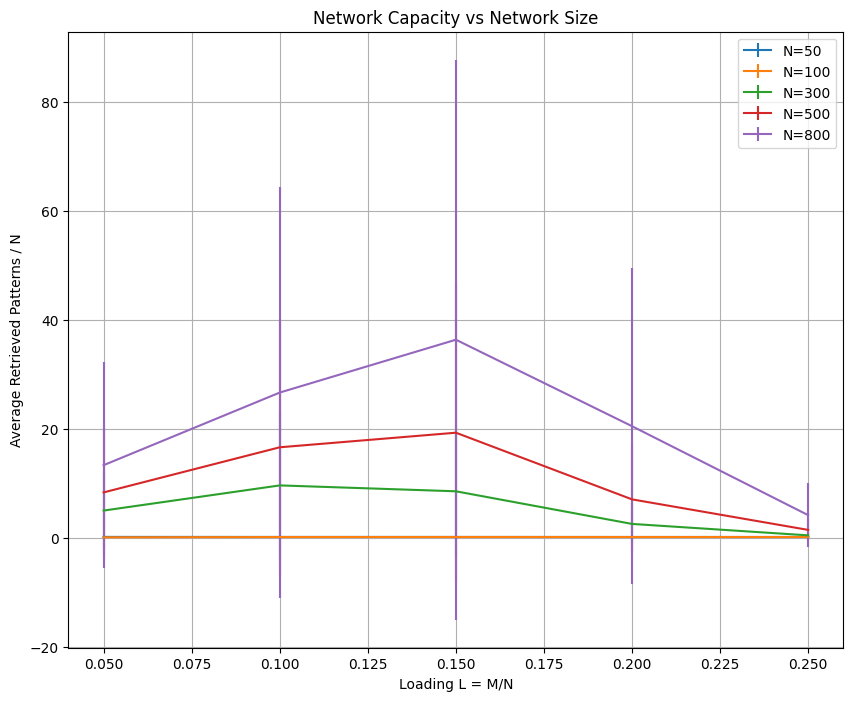

In [15]:
def capacity_study(N_values, loading_values, trials=10):
    """Study the capacity of Hopfield networks across different sizes and loadings."""
    results = {N: [] for N in N_values}

    for N in N_values:
        print(N)
        for L in loading_values:
            M = int(L * N)
            retrieval_rates = [run_simulation_dictionary(M, N) for _ in range(trials)]
            mean_retrieval_rate = np.mean(retrieval_rates)
            std_retrieval_rate = np.std(retrieval_rates)
            results[N].append((mean_retrieval_rate, std_retrieval_rate))

    # Plotting the results
    plt.figure(figsize=(10, 8))
    for N in N_values:
        means, stds = zip(*results[N])
        plt.errorbar(loading_values, means, yerr=stds, label=f'N={N}')

    plt.xlabel('Loading L = M/N')
    plt.ylabel('Average Retrieved Patterns / N')
    plt.title('Network Capacity vs Network Size')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
N_values = [50, 100, 300, 500, 800]
loading_values = [0.05, 0.1, 0.15, 0.2, 0.25]
capacity_study(N_values, loading_values)

## Exercice 1.8

In [16]:
def plot_beta_impact(N, M, beta_values):
    """ Plot the impact of beta on network retrieval capacity. """
    _,_,retrieval_rates = [run_simulation_dictionary(N, M, beta=beta) for beta in beta_values]

    plt.figure(figsize=(8, 5))
    plt.plot(beta_values, retrieval_rates, marker='o')
    plt.xlabel('Inverse Temperature Beta')
    plt.ylabel('Retrieval Rate')
    plt.title('Impact of Beta on Memory Retrieval')
    plt.grid(True)
    plt.show()

# Parameters
N = 300  # Number of neurons
M = 5    # Number of patterns
beta_values = np.linspace(0.1, 10, 20)  # Range of beta values to test

plot_beta_impact(N, M, beta_values)

ValueError: too many values to unpack (expected 3)

# Exercise 2 Low-activity patterns
## Exercise 2.1

In [ ]:
# Ex 2.1 Equivalence of the standard Hopfield model to low-activity patterns
# This is a theoretical question that requires analyzing the model equations and comparing the models.
# You would need to write down the expressions and compare them to find the values of a, b, and θ that make the models equivalent.



### Comparaison of the two models  
The input for the classical model is : $h_{i}(t)= \sum_{j}{w_{ij}S_{j}(t)}$

If we take $S_{i}(t)=2\sigma_{i}-1$, 

We can find the inpput for a low activity patterns :

 $h_{i}(t)= \sum_{j}{w_{ij}\sigma_{j}(t)}-\theta$, with $w_{ij}=c/N \sum_{j}{(\xi_{i}^{\mu}-b)(\xi_{j}^{\mu}-a)}$

 This model is approximately equivalent to the standard one if $a=b=0.5$ (symmetric model) and $\theta=\sum_{j}w_{ij}$

The model is exactly equivalent to the standard model (upon averaging over the stochastic update), only if the means activities of the patterns are zero. Therefore, we have $\theta = 0$
 

## Exercise 2.2

In [56]:
def generate_low_activity_patterns(N, M, activity):
    """
    Generate M low-activity patterns with N neurons each,
    where each neuron has a probability 'activity' of being 1.
    """
    return np.random.choice([0, 1], (M, N), p=[1-activity, activity])
def compute_weight_matrix(pattern,N,a,b):
    pattern_a=pattern-np.full((pattern.shape),a)
    pattern_b=pattern-np.full((pattern.shape),b)
    
    c= 2/(a*(1-a))
    
    return c/N* np.dot(pattern_b.T, pattern_a)
"""
def hamming_distance_(P, Q):
    
    Compute the Hamming distance between two patterns.
    
    return np.sum(P != Q) / len(P)
"""
def stochastic_spike_variable(S):
    """
    Generate a stochastic spike variable for each neuron based on its state S.
    Probability is derived from the neuron's continuous value.
    """
    return np.random.binomial(1, 0.5 * (S + 1))

def compute_overlaps(patterns, S, a):
    """
    Compute the overlaps m_mu for each pattern.
    """
    overlaps= np.dot((patterns-np.full((patterns.shape),a)),S)
   
    return overlaps

def update_states_with_overlaps(patterns, overlaps,theta, beta,b):
    """
    Update the states of the network based on overlaps and pattern influence.
    """
    H= np.dot(overlaps,(patterns-np.full((patterns.shape),b))) 
    H-=theta
    return np.tanh(beta * H)

def run_simulation_low_activity(N, M_values, a, b, theta_values, beta, T, c=2):
    """
    Run the simulation for multiple theta values and plot the retrieval accuracy.
    """
    patterns = generate_low_activity_patterns(N, M, a)
    initial_state = patterns[0].copy()  # Initialize the state close to the first pattern
    hamming_distances = []

    for theta in theta_values:
            S = initial_state.copy()
            for t in range(T):
                overlaps = compute_overlaps(patterns, S, a)
                S = update_states_with_overlaps(patterns, overlaps,theta, beta,b)
                S = np.array([stochastic_spike_variable(si) for si in S])
            # Evaluate performance after the last update
            distances = [hamming_distance(S, p) for p in patterns]
            mean_distance = np.mean(distances)
            hamming_distances.append(mean_distance)

    return theta_values, hamming_distances

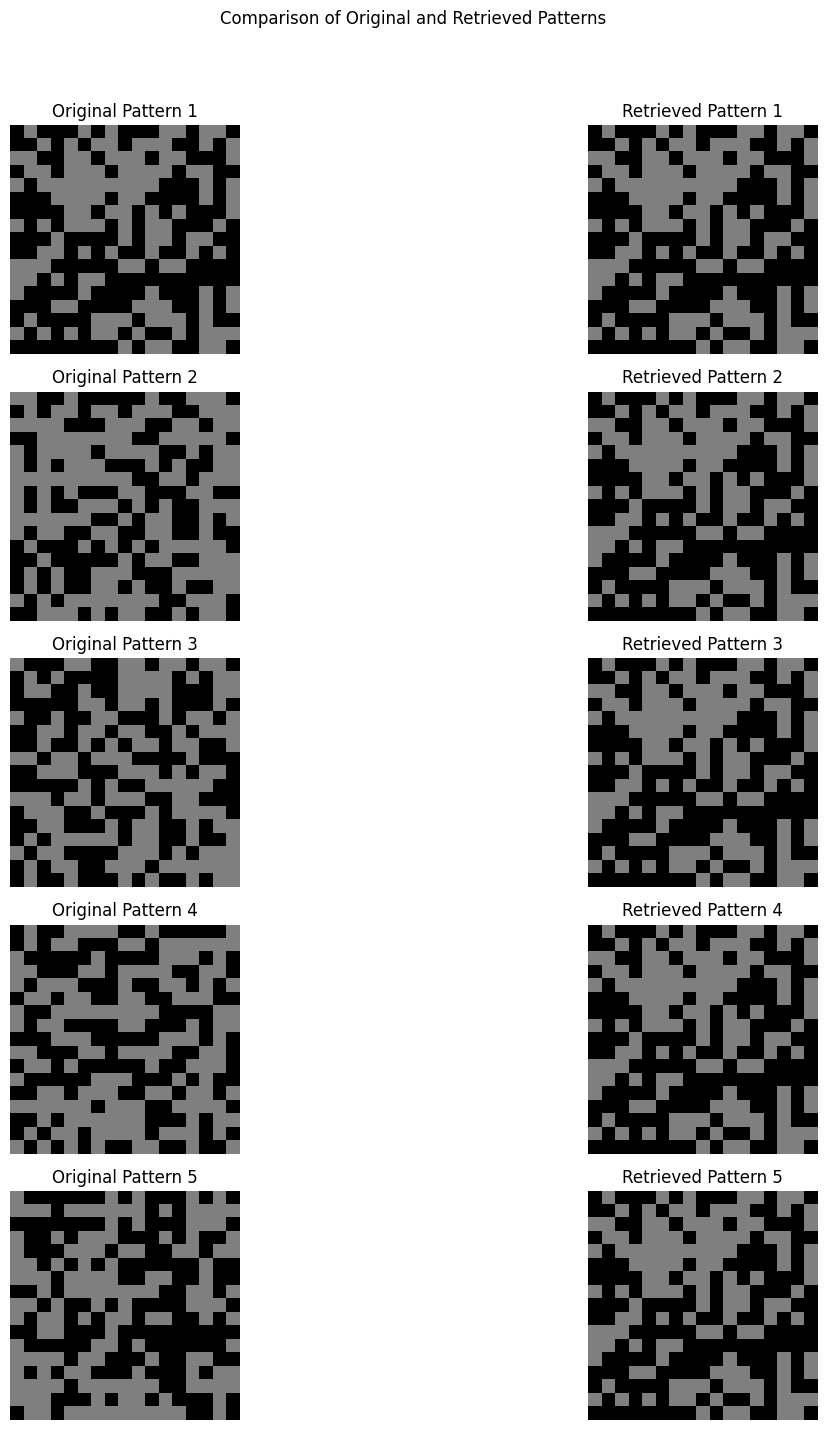

In [18]:
N=289 #neurons
M= 5 #patterns
a=0.5
b=0.5
beta=4
c=2/(a*(1-a))
patterns=generate_low_activity_patterns(N,M,a)
initial_state = flip_bits(patterns[0], c=0.15)

weight=compute_weight_matrix(patterns,N,a,b)
#theta =np.sum(weight)
theta=0
S=initial_state
for t in range(T):
            overlaps = compute_overlaps(patterns, S, a)
            S = update_states_with_overlaps(patterns, overlaps,theta, beta,b)
            S = np.array([stochastic_spike_variable(si) for si in S])


fig, ax = plt.subplots(nrows=M, ncols=2, figsize=(15, 15))
    # Display the original pattern
for i in range(M):
    ax[i, 0].imshow(patterns[i].reshape(17,17), cmap='binary', vmin=-1, vmax=1)
    ax[i, 0].set_title(f'Original Pattern {i+1}')
    ax[i, 0].axis('off')  # Hide grid lines and ticks for clarity
    # Display the retrieved pattern
    ax[i, 1].imshow(S.reshape(17,17), cmap='binary', vmin=-1, vmax=1)
    ax[i, 1].set_title(f'Retrieved Pattern {i+1}')
    ax[i, 1].axis('off')  # Hide grid lines and ticks for clarity
plt.suptitle("Comparison of Original and Retrieved Patterns")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("Ex0.2_pattern_retrieval.png", )
plt.show()



In [19]:
N = 300  # neurons
M = 5    # patterns
a = 0.1  # activity level
b = 0.1  # parameter for weight calculation
theta = [0.5]  # neuronal firing threshold
beta = 4  # inverse temperature
T = 20   # time steps

final_state = run_simulation_low_activity(N, M, a, b, theta, beta, T)
print(final_state)

([0.5], [0.15866666666666665])


## Exercise 2.3


In [66]:
def run_simulation_and_plot(N, M_values, a, b, theta_values, beta, T, c=2):
    """
    Run the simulation for multiple theta values and plot the retrieval accuracy.
    """
    retrieval_rates = np.zeros((len(M_values), len(theta_values)))

    for i, M in enumerate(M_values):
        print(M)
        patterns = generate_low_activity_patterns(N, M, a)

        for j, theta in enumerate(theta_values):
            retrieval_count=0
            for pattern in patterns:
                # Initialize the state close to the pattern with some bits flipped
                initial_state = pattern.copy()
                initial_state = flip_bits(initial_state,0.05)  # Flip the bits
                S = initial_state.copy()
                for _ in range(T):
                    overlaps = compute_overlaps(patterns, S, a)
                    S = update_states_with_overlaps(patterns, overlaps, theta, beta, b)
                    S = np.array([stochastic_spike_variable(si) for si in S])
                # Evaluate performance after the last update
                if hamming_distance(S, pattern) <= 0.05:
                    retrieval_count += 1
    
            retrieval_rate = retrieval_count / M
            retrieval_rates[i, j] = retrieval_rate

    # Plotting the results
    plt.figure(figsize=(10, 8))
    for j, theta in enumerate(theta_values):
        plt.plot(M_values, retrieval_rates[:, j], label=f'Theta = {theta:.2f}', marker='o')

    plt.xlabel('Number of Patterns (M)')
    plt.ylabel('Retrieval Rate (Fraction of Patterns Retrieved)')
    plt.title('Network Capacity vs Number of Patterns and Theta')
    plt.legend()
    plt.grid(True)
    plt.show()


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


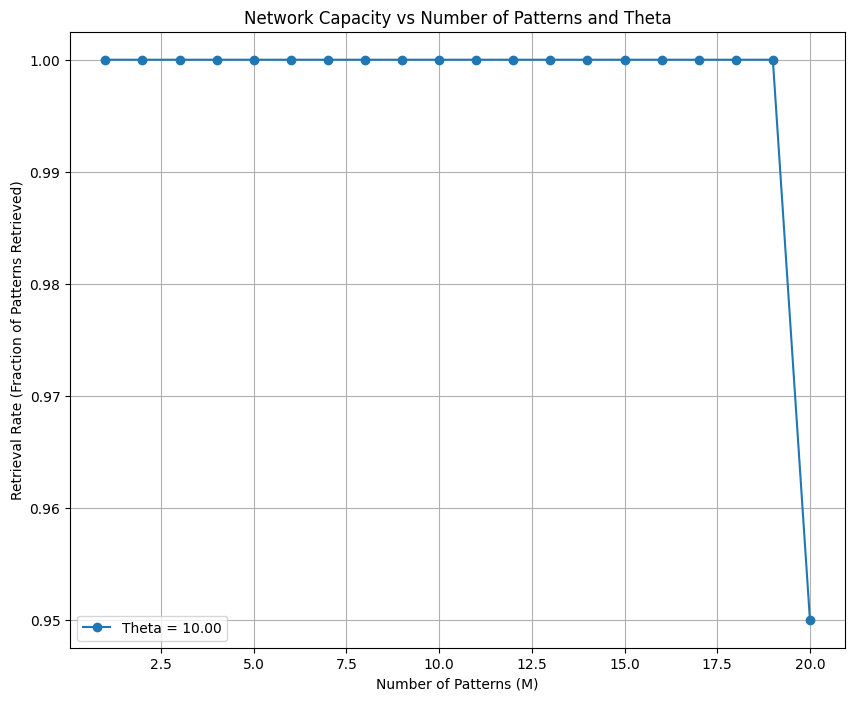

"\n# Plotting the results\nplt.figure(figsize=(10, 6))\nplt.plot(theta_vals, mean_distances, marker='o')\nplt.title('Mean Hamming Distance Across Theta Values')\nplt.xlabel('Theta')\nplt.ylabel('Mean Hamming Distance (Lower is better)')\nplt.grid(True)\nplt.show()\n"

In [73]:
# Ex 2.3 Compute the capacity of the network with N=300 and low-activity patterns
# You would need to run simulations similar to the previous exercises to estimate the network's capacity.
N = 300  # Number of neurons
M_values = np.arange(1, 21, 1)    # Number of patterns
a = 0.1  # Activity level
b=0.1
theta_values =[10.0]
#theta_values = np.linspace(0, 1, 10)  # Range of theta values to test
beta = 4  # Inverse temperature
T = 50   # Time steps

# Run the simulation
run_simulation_and_plot(N, M_values, a, b, theta_values, beta, T)

"""
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(theta_vals, mean_distances, marker='o')
plt.title('Mean Hamming Distance Across Theta Values')
plt.xlabel('Theta')
plt.ylabel('Mean Hamming Distance (Lower is better)')
plt.grid(True)
plt.show()
"""

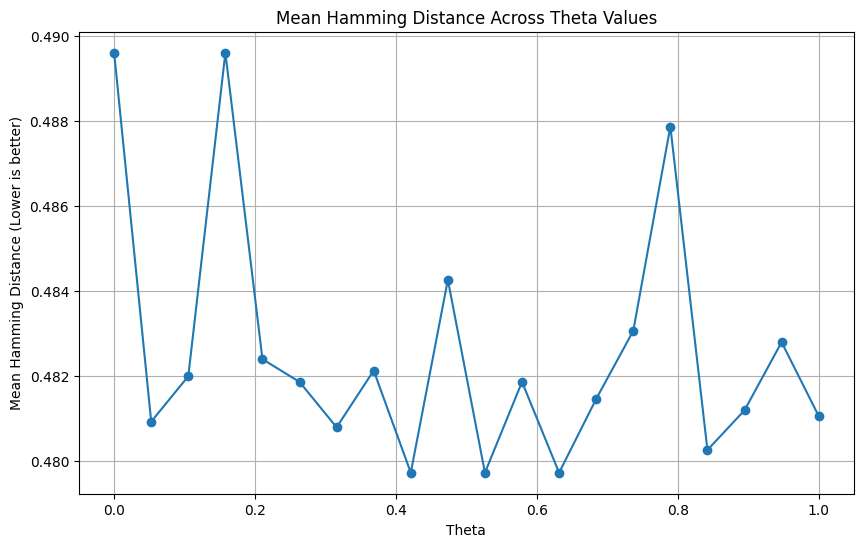

In [24]:
# Ex 2.4 Find the threshold θ that corresponds to the best capacity for a=b=0.5
# This involves running simulations over a range of θ values and observing which one results in the highest capacity.

N = 300  # Number of neurons
M = 50    # Number of patterns
a = 0.5  # Activity level
b=0.5
theta_values = np.linspace(0, 1, 20)  # Range of theta values to test
beta = 4  # Inverse temperature
T = 20   # Time steps

# Run the simulation
theta_vals, mean_distances = run_simulation_low_activity(N, M, a, b, theta_values, beta, T)


# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(theta_vals, mean_distances, marker='o')
plt.title('Mean Hamming Distance Across Theta Values')
plt.xlabel('Theta')
plt.ylabel('Mean Hamming Distance (Lower is better)')
plt.grid(True)
plt.show()

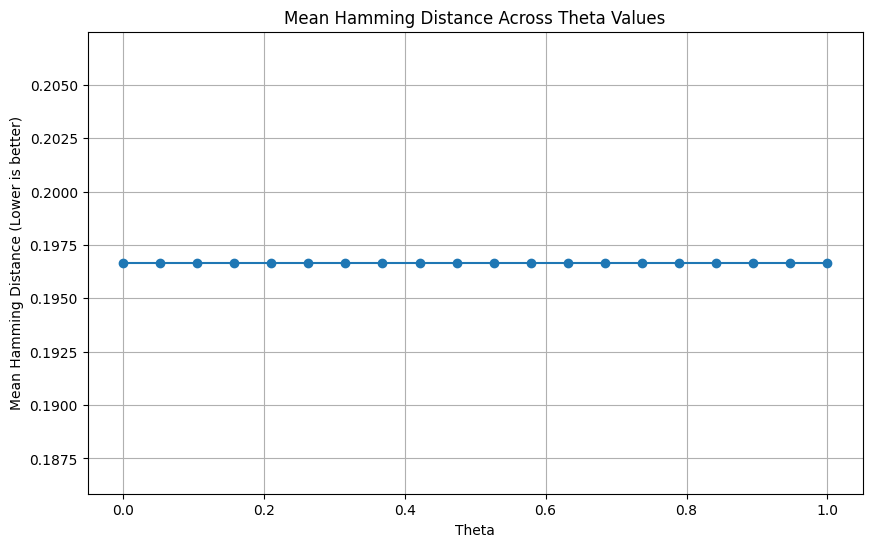

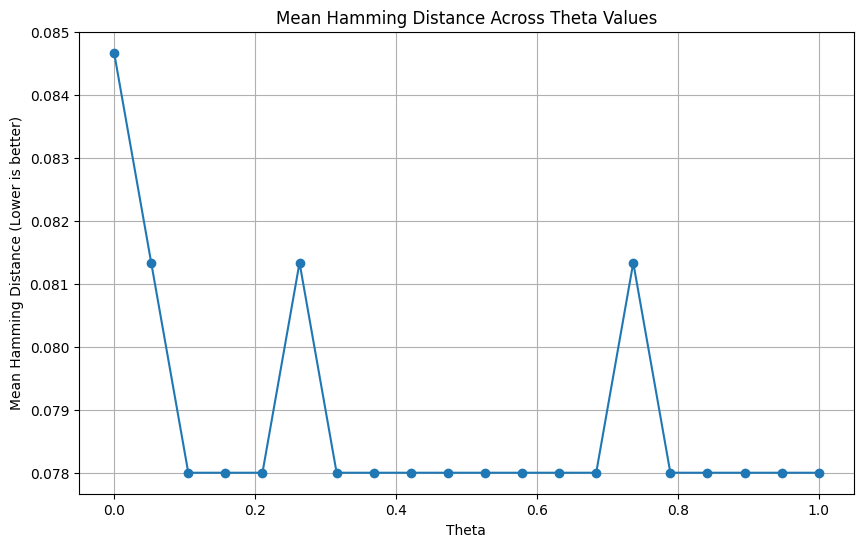

In [22]:
a = 0.1  # Activity level

theta_vals, mean_distances = run_simulation_low_activity(N, M, a, a, theta_values, beta, T)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(theta_vals, mean_distances, marker='o')
plt.title('Mean Hamming Distance Across Theta Values')
plt.xlabel('Theta')
plt.ylabel('Mean Hamming Distance (Lower is better)')
plt.grid(True)
plt.show()

a = 0.05  # Activity level

theta_vals, mean_distances = run_simulation_low_activity(N, M, a, a, theta_values, beta, T)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(theta_vals, mean_distances, marker='o')
plt.title('Mean Hamming Distance Across Theta Values')
plt.xlabel('Theta')
plt.ylabel('Mean Hamming Distance (Lower is better)')
plt.grid(True)
plt.show()

In [ ]:
# Ex 2.5 Repeat for different values of a and b for low-activity cases
# Similar to Ex 2.4, you would vary a and b and run simulations to find the optimal θ and the corresponding capacity.


In [ ]:

# Ex 2.6 Experiment with asymmetric connectivities by varying the value of b
# Yet again, this would involve simulations where you vary b and measure the network's capacity, looking for the optimal combination of b and θ.

# Below is an example simulation loop for Ex 2.3
def simulate_capacity(N, M, activity, theta, beta=4, iterations=100):
    patterns = generate_low_activity_patterns(N, M, activity)
    retrieved_patterns = 0

    for _ in range(iterations):
        initial_state = np.random.choice([0, 1], N, p=[1-activity, activity])
        state = initial_state

        for t in range(20):  # Run for a certain number of time steps
            state = update_states_with_overlaps(state, patterns, activity, activity, [theta], beta,N,0.1)

        # Check if the first pattern is retrieved
        if hamming_distance(state, patterns[0]) <= 0.05:
            retrieved_patterns += 1

    return retrieved_patterns / iterations

# Example simulation with specific parameters
N = 300
M = 5
activity = 0.1
theta = 0.1  # This would be varied to find the optimal value
retrieval_rate = simulate_capacity(N, M, activity, theta)
print(f"Retrieval rate: {retrieval_rate}")


# Exercice 3

In [ ]:
import numpy as np

# Ex 3.1 Write down the total input to an excitatory and an inhibitory neuron
# This is a theoretical question that requires expressing the total input in terms of the model parameters.
# You would need to write the expressions based on the equations provided in the document.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_weights(N_exc, N_inh, patterns, c):
    """ Initialize weight matrices for E-E and E-I connections """
    W_EE = np.zeros((N_exc, N_exc), dtype=float)
    W_IE = np.zeros((N_inh, N_exc),dtype=float)
    for pattern in patterns:
        W_EE += np.outer(pattern, pattern)
    W_EE *= c / N_exc
    W_IE.fill(1.0 / N_exc)  # Simplified for demonstration
    return W_EE, W_IE

def update_network_synchronous(S_exc, S_inh, W_EE, W_IE, beta):
    """ Perform synchronous update of the network """
    H_exc = np.dot(W_EE, S_exc) - np.dot(W_IE.T, S_inh)
    H_inh = np.dot(W_IE, S_exc)
    S_exc = np.tanh(beta * H_exc)
    S_inh = np.tanh(beta * H_inh)
    return S_exc, S_inh

def simulate_network(N_exc, N_inh, M_values, a, c, beta, T):
    """ Simulate the network across a range of M values to study storage capacity. """
    retrieval_threshold = 0.05  # Define a threshold for considering a pattern successfully retrieved
    loadings = []
    retrieval_rates = []

    for M in M_values:
        patterns = np.random.choice([0, 1], (M, N_exc), p=[1-a, a])
        patterns = np.array(patterns,dtype=float)
        print(patterns)
        print(type(patterns))
        W_EE, W_IE = initialize_weights(N_exc, N_inh, patterns, c)
        S_exc = np.random.choice([0, 1], N_exc)  # Random initial state for excitatory neurons
        S_inh = np.random.choice([0, 1], N_inh)  # Random initial state for inhibitory neurons
        retrieval_count = 0

        for pattern in patterns:
            S_exc_current = pattern.copy()  # Initialize S_exc with the pattern
            S_inh_current = S_inh.copy()
            for _ in range(T):
                S_exc_current, S_inh_current = update_network_synchronous(S_exc_current, S_inh_current, W_EE, W_IE, beta)
            print(S_exc_current, S_inh_current)
            if hamming_distance(S_exc_current, pattern) <= retrieval_threshold:
                retrieval_count += 1

        retrieval_rate = retrieval_count / M
        retrieval_rates.append(retrieval_rate)
        loadings.append(M / N_exc)

    return loadings, retrieval_rates

In [ ]:
N_exc = 300  # Number of excitatory neurons
N_inh = 100  # Number of inhibitory neurons
M_values = range(5, 155, 10)  # Various numbers of patterns to store and test
a = 0.1  # Activity level of the patterns
c = 1.0  # Scaling factor for weights
beta = 2  # Inverse temperature for the tanh function
T = 20   # Number of time steps

# Run the simulation
loadings, retrieval_rates = simulate_network(N_exc, N_inh, M_values, a, c, beta, T)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(loadings, retrieval_rates, marker='o')
plt.title('Storage Capacity vs. Loading (L = M/N_exc)')
plt.xlabel('Loading (L)')
plt.ylabel('Retrieval Rate (Fraction of Patterns Retrieved)')
plt.grid(True)
plt.show()

In [ ]:
# Ex 3.2 Write a method for simulating the new model
def simulate_separate_inhibitory_population(N, NI, M, K, T, a, theta, beta=4, synchronous_update=True):
    # Initialize pattern matrix with low activity a
    patterns = np.random.choice([0, 1], (M, N), p=[1-a, a])

    # Initialize weights for excitatory to excitatory
    W_EE = (1/N) * patterns.T @ patterns

    # Initialize weights for inhibitory to excitatory and vice versa
    W_IE = (1/K) * np.ones((N, NI))
    W_EI = (a / NI) * np.ones((NI, N))

    # Initialize states for excitatory and inhibitory neurons
    S_E = np.random.choice([0, 1], N, p=[1-a, a])
    S_I = np.zeros(NI)

    # Initialize history of states for plotting
    history = np.zeros((T, N))

    for t in range(T):
        # Compute input to inhibitory neurons from excitatory
        h_I = W_IE.T @ S_E

        # Update inhibitory neurons
        S_I = h_I > theta  # Linear threshold unit

        # Compute input to excitatory neurons from excitatory and inhibitory
        h_E = W_EE @ S_E - W_EI @ S_I

        # Update excitatory neurons
        if synchronous_update:
            S_E = np.tanh(beta * h_E)
        else:
            S_E_new = np.tanh(beta * h_E)
            S_E = S_E_new

        # Save state
        history[t] = S_E

    return history


In [ ]:

# Ex 3.3 Study the storage capacity with and without synchronous update
# You would run simulations for different values of M/N (loading L) and compare the performance


In [ ]:

# Ex 3.4 Add a second inhibitory population and repeat the capacity study
# You would modify the simulation function to include the second inhibitory population and run simulations to compare

import numpy as np
import matplotlib.pyplot as plt

def initialize_weights(N_exc, N_inh, patterns, c, a):
    """ Initialize weight matrices for E-E, E-I, and I-E connections, including a second inhibitory population """
    W_EE = np.zeros((N_exc, N_exc))
    W_IE1 = np.zeros((N_inh, N_exc))  # First inhibitory population
    W_IE2 = np.zeros((N_inh, N_exc))  # Second inhibitory population

    for pattern in patterns:
        W_EE += np.outer(pattern, pattern)
    W_EE *= c / N_exc
    W_IE1.fill(1.0 / N_exc)  # Simplified for demonstration

    # Assume second inhibitory population has uniform weights, activated based on mean activity
    W_IE2.fill(c * a / N_exc)  # Activated when mean activity of excitatory neurons > a

    return W_EE, W_IE1, W_IE2

def update_network_synchronous(S_exc, S_inh1, S_inh2, W_EE, W_IE1, W_IE2, beta, a):
    """ Perform synchronous update of the network including a second inhibitory population """
    mean_activity = np.mean(S_exc)
    H_exc = np.dot(W_EE, S_exc) - np.dot(W_IE1.T, S_inh1)

    if mean_activity > a:
        H_exc -= np.dot(W_IE2.T, S_inh2)

    H_inh1 = np.dot(W_IE1, S_exc)
    H_inh2 = np.dot(W_IE2, S_exc) if mean_activity > a else np.zeros_like(S_inh2)

    S_exc = np.tanh(beta * H_exc)
    S_inh1 = np.tanh(beta * H_inh1)
    S_inh2 = np.tanh(beta * H_inh2)
    return S_exc, S_inh1, S_inh2

def simulate_network(N_exc, N_inh, patterns, c, beta, T, a):
    """ Simulate the network with given parameters including a second inhibitory population """
    W_EE, W_IE1, W_IE2 = initialize_weights(N_exc, N_inh, patterns, c, a)
    S_exc = np.random.choice([0, 1], N_exc)  # Random initial state for excitatory neurons
    S_inh1 = np.random.choice([0, 1], N_inh)  # Random initial state for first inhibitory population
    S_inh2 = np.random.choice([0, 1], N_inh)  # Random initial state for second inhibitory population

    for t in range(T):
        S_exc, S_inh1, S_inh2 = update_network_synchronous(S_exc, S_inh1, S_inh2, W_EE, W_IE1, W_IE2, beta, a)

    return S_exc, S_inh1, S_inh2

In [ ]:
# Parameters for simulation
N_exc = 300  # Number of excitatory neurons
N_inh = 100  # Number of inhibitory neurons
patterns = [np.random.choice([0, 1], N_exc, p=[0.9, 0.1]) for _ in range(5)]  # Low-activity patterns
c = 1.0  # Scaling factor for weights
beta = 2  # Inverse temperature for the tanh function
T = 50  # Number of time steps
a = 0.1  # Activation threshold for the second inhibitory population

# Run the network simulation
S_exc, S_inh1, S_inh2 = simulate_network(N_exc, N_inh, patterns, c, beta, T, a)
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(loadings, retrieval_rates, marker='o')
plt.title('Storage Capacity vs. Loading (L = M/N_exc)')
plt.xlabel('Loading (L)')
plt.ylabel('Retrieval Rate (Fraction of Patterns Retrieved)')
plt.grid(True)
plt.show()

In [ ]:

# Ex 3.5 Implement pattern retrieval with external input
# You would modify the simulation function to include external input when presenting patterns

import numpy as np
import matplotlib.pyplot as plt

def initialize_weights(N_exc, N_inh, patterns, c):
    """ Initialize weight matrices for E-E and E-I connections including a second inhibitory population """
    W_EE = np.zeros((N_exc, N_exc))
    W_IE = np.zeros((N_inh, N_exc))
    for pattern in patterns:
        W_EE += np.outer(pattern, pattern)
    W_EE *= c / N_exc
    W_IE.fill(1.0 / N_exc)  # Simplified for demonstration
    return W_EE, W_IE

def external_input(S_exc, pattern, J, M):
    """ Calculate the external input to the excitatory neurons based on the current pattern """
    return J * (pattern - np.mean(patterns, axis=0))

def update_network_with_input(S_exc, S_inh, W_EE, W_IE, beta, input):
    """ Update the network state with external input """
    H_exc = np.dot(W_EE, S_exc) - np.dot(W_IE.T, S_inh) + input
    H_inh = np.dot(W_IE, S_exc)
    S_exc = np.tanh(beta * H_exc)
    S_inh = np.tanh(beta * H_inh)
    return S_exc, S_inh

def simulate_pattern_presentation(N_exc, N_inh, patterns, c, beta, J, T, presentation_steps):
    S_exc_history = []
    """ Simulate the network with pattern presentations and external inputs """
    W_EE, W_IE = initialize_weights(N_exc, N_inh, patterns, c)
    S_exc = np.random.choice([0, 1], N_exc)
    S_inh = np.random.choice([0, 1], N_inh)
    pattern_order = np.random.permutation(len(patterns))

    for idx in pattern_order:
        current_pattern = patterns[idx]
        input = external_input(S_exc, current_pattern, J, len(patterns))
        for _ in range(presentation_steps):
            S_exc, S_inh = update_network_with_input(S_exc, S_inh, W_EE, W_IE, beta, input)
            S_exc_history.append(S_exc.copy())
        # Measure retrieval accuracy
        overlap = 1 - np.mean(np.abs(current_pattern - S_exc))  # Example measure of overlap
        print(f'Pattern {idx + 1}: Overlap after presentation = {overlap:.2f}')
    return np.array(S_exc_history)


In [ ]:
import matplotlib.pyplot as plt

def plot_raster(S_exc_history):
    plt.figure(figsize=(10, 6))
    plt.imshow(S_exc_history, aspect='auto', cmap='binary')
    plt.xlabel('Neuron Index')
    plt.ylabel('Time Step')
    plt.title('Raster Plot of Excitatory Neurons')
    plt.colorbar(label='Activation')
    plt.show()

# Parameters for simulation
N_exc = 300  # Number of excitatory neurons
N_inh = 100  # Number of inhibitory neurons
patterns = [np.random.choice([0, 1], N_exc, p=[0.9, 0.1]) for _ in range(10)]  # 10 low-activity patterns
c = 1.0  # Scaling factor for weights
beta = 2  # Inverse temperature
J = 2  # Strength of external input
T = 50  # Total time steps
presentation_steps = 5  # Time steps each pattern is presented

# Run the simulation
S_exc_history = simulate_pattern_presentation(N_exc, N_inh, patterns, c, beta, J, T, presentation_steps)
plot_raster(S_exc_history)
# Example usage (assuming S_exc_history is collected during simulation):
# plot_raster(S_exc_history)

In [ ]:
# Ex 3.6 Analyze the dependency of pattern retrieval on network loading and pattern properties
# This would involve running simulations with various network loadings and pattern properties and analyzing the results
import numpy as np
import matplotlib.pyplot as plt

def generate_patterns(N, M, sparsity):
    """Generate sparse binary patterns."""
    return np.random.choice([0, 1], size=(M, N), p=[1-sparsity, sparsity])

def initialize_weights(patterns, N):
    """Initialize weights using Hebbian learning."""
    W = np.zeros((N, N))
    for p in patterns:
        W += np.outer(p, p)
    np.fill_diagonal(W, 0)
    return W / N

def retrieve_pattern(W, pattern, iterations=100):
    """Asynchronously update the network to retrieve a pattern."""
    N = len(pattern)
    state = pattern.copy()
    for _ in range(iterations):
        for i in np.random.permutation(N):
            state[i] = 1 if np.dot(W[i], state) > 0 else 0
    return state

def pattern_retrieval_accuracy(patterns, W):
    """Measure how many patterns are retrieved accurately."""
    N = patterns.shape[1]
    successful_retrievals = 0
    for p in patterns:
        retrieved = retrieve_pattern(W, p)
        if np.array_equal(retrieved, p):
            successful_retrievals += 1
    return successful_retrievals / len(patterns)

# Network parameters
N = 100  # number of neurons
M_values = np.arange(5, 55, 5)  # different numbers of patterns
sparsity_values = [0.1, 0.3, 0.5]  # sparsity of the patterns

plt.figure(figsize=(10, 8))

for sparsity in sparsity_values:
    accuracies = []
    for M in M_values:
        patterns = generate_patterns(N, M, sparsity)
        W = initialize_weights(patterns, N)
        accuracy = pattern_retrieval_accuracy(patterns, W)
        accuracies.append(accuracy)
    plt.plot(M_values, accuracies, label=f'Sparsity = {sparsity}')

plt.xlabel('Number of Stored Patterns (M)')
plt.ylabel('Retrieval Accuracy')
plt.title('Pattern Retrieval Accuracy vs. Number of Patterns')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

# Ex 3.7 (Bonus) Explore how to improve network capacity
# This could involve experimenting with network parameters, learning rules, or model structures to maximize capacity
def pseudoinverse_weights(patterns):
    """Calculate weights using the pseudoinverse rule."""
    P = np.vstack(patterns).T  # pattern matrix
    P_inv = np.linalg.pinv(P)  # pseudoinverse of the pattern matrix
    return np.dot(P, P_inv)

# Simulate with pseudoinverse weights
N = 100
M = 100  # Set M equal to N for demonstration
patterns = generate_patterns(N, M, 0.1)  # Sparse patterns
W = pseudoinverse_weights(patterns)
accuracy = pattern_retrieval_accuracy(patterns, W)

print(f'Retrieval accuracy with pseudoinverse weights for M=N={N}: {accuracy:.2f}')